# Define the dataset

In [1]:
import pandas as pd
df = pd.DataFrame({
    'StorageTemperature': [2, 8, 15, 25],
    'TotalMushrooms': [30,25,20,30],
    'SpoiledMushrooms': [2,4,5,20]
})
df

,StorageTemperature,TotalMushrooms,SpoiledMushrooms
0,2,30,2
1,8,25,4
2,15,20,5
3,25,30,20


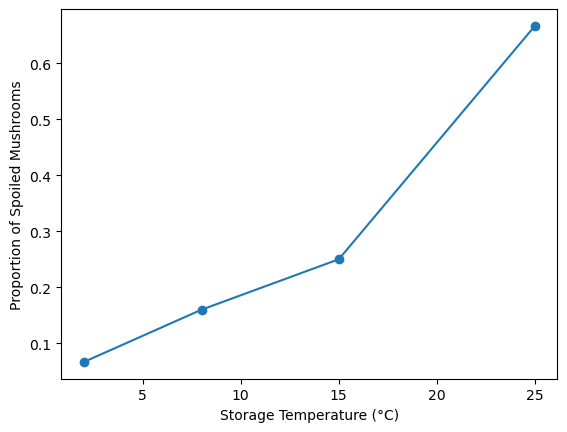

In [2]:
import matplotlib.pyplot as plt
x = df['StorageTemperature'].values
y = df['SpoiledMushrooms'].values
p = y / df['TotalMushrooms'].values
plt.figure()
plt.plot(x, p, 'o-')
plt.xlabel('Storage Temperature (°C)')
plt.ylabel('Proportion of Spoiled Mushrooms')
plt.show()

The plots show the relationship between storage temperature and mushroom spoilage. The relationship looks roughly linear, with higher temperatures leading to a higher proportion of spoiled mushrooms.

# Modelling assumptions:
1. The outcome of the \($n_i$\) mushrooms within each group \(i\) are *independent*.  
   Each mushroom in the group has probability \($p_i$\) of death.

2. The probability \($p_i$\) that a mushroom spoils depends on the temperature level \($x_i$\) as follows:

   $$
   p_i = \text{sigm}(\alpha + \beta x_i)
   $$

   where

   $$
   \text{sigm}(z) = \frac{1}{1 + e^{-z}}
   $$

3.  The parameters $\theta = [\alpha, \beta]^\top$ have independent Gaussian priors:
    \begin{align}
    \alpha &\sim \mathcal{N}(\mu_\alpha, \sigma_\alpha^2), \quad \mu_\alpha = 0, \sigma_\alpha = 2 \\
    \beta &\sim \mathcal{N}(\mu_\beta, \sigma_\beta^2), \quad \mu_\beta = 0, \sigma_\beta = 1
    \end{align}

4.  The outcomes in the four groups are independent of each other, given $𝜃$.


## 1.1: Probabilistic model

* Derive and comment the full probabilistic model.

## Bayesian Logistic Regression Model

We aim to model the spoilage of mushrooms based on temperature.

### 1. Variables
* $i$: Index for the experimental group.
* $n_i$: Total number of mushrooms in group $i$.
* $y_i$: Number of spoiled mushrooms in group $i$.
* $x_i$: Temperature level for group $i$.

### 2. Likelihood
The outcome of the $n_i$ mushrooms within each group $i$ is independent. The number of spoiled mushrooms follows a Binomial distribution:

$$y_i \sim \text{Binomial}(n_i, p_i)$$
where $p_i$ is the probability of spoilage in group $i$ and $n_i$ is the total number of mushrooms in group $i$.


The probability $p_i$ that a mushroom spoils depends on the temperature $x_i$ so we can model the log odds of spoilage as a linear function of temperature:

$$sigmoid(z) = \frac{1}{1 + e^{-z}}$$
so in our case:

$$p_i = \text{sigmoid}(\alpha + \beta x_i) = \frac{1}{1 + e^{-(\alpha + \beta x_i)}}$$


### 3. Prior
The parameters $\theta = [\alpha, \beta]^\top$ have independent Gaussian priors:

$$ \alpha \sim \mathcal{N}(0, 2^2) $$
$$ \beta \sim \mathcal{N}(0, 1^2) $$

**Derivation of the joint prior density:**
Due to independece the joint prior density is the product of the individual priors:
$$ f(\theta) = f(\alpha, \beta) = f(\alpha) \cdot f(\beta)$$

Moreover, given $ (\alpha, \beta) $ the outcomes in the four groups are independent of each other.

$$
P(\mathbf{y} \mid \alpha, \beta) = \prod_{i=1}^4 P(y_i \mid n_i, x_i, \alpha, \beta)
$$

Substituting the standard normal PDF formula $$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ with our specific hyperparameters ($\sigma_\alpha=2, \sigma_\beta=1, \mu=0$):

$$ \begin{aligned}
f(\alpha, \beta) &= \left( \frac{1}{\sqrt{2\pi \cdot 4}} e^{-\frac{\alpha^2}{2 \cdot 4}} \right) \cdot \left( \frac{1}{\sqrt{2\pi \cdot 1}} e^{-\frac{\beta^2}{2 \cdot 1}} \right) \\
&= \left( \frac{1}{2\sqrt{2\pi}} \cdot \frac{1}{\sqrt{2\pi}} \right) \cdot \exp\left( -\frac{\alpha^2}{8} - \frac{\beta^2}{2} \right) \\
&= \frac{1}{4\pi} \exp\left( \frac{-\alpha^2}{8} - \frac{4\beta^2}{8} \right)
\end{aligned}
$$



**Final Joint Prior:**
$$
f(\alpha, \beta) = \frac{1}{4\pi} \exp \left( -\frac{\alpha^2 + 4\beta^2}{8} \right)
$$



## 1.2: Maximum Likelihood estimation
* Derive an analytical expression of the likelihood function $\mathcal{L}(\theta) = P(y|\theta)$.

The total likelihood function is just the product of the likelihoods of each group:

$$
\mathcal{L}(\vec{\theta}) = \prod_{i=1}^{n} \binom{n_i}{y_i} \cdot p_i^{y_i} \cdot (1-p_i)^{n_i-y_i}
$$
For each group $i$, the likelihood of observing $y_i$ spoiled mushrooms out of $n_i$ given the spoilage probability $p_i$ is given by the Binomial distribution formula

Substituting $p_i = \mathrm{sigm}(\alpha + \beta x_i)$:

$$
= \prod_{i=1}^{n} \binom{n_i}{y_i} \cdot \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i}
$$


$$
\propto \prod_{i=1}^{n} \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i}
$$

We can ignore the binomial coefficients $\binom{n_i}{y_i}$ since they do not depend on the parameters $\theta = [\alpha, \beta]^\top$ and thus do not affect the location of the maximum likelihood estimate.
They do not depend because they are constants with respect to $\alpha$ and $\beta$.

n is the number of groups (4 in this case) NOT the number of samples.

* Derive an analytical expression of the log-likelihood function $\ell(\theta)$

Multiplying several probability mass function leads to very small numbers that can cause numerical underflow, using the log-likelihood we ensure numerical stability, in fact a log of a product becomes a sum which ensures we don't go towards zero.

Moreover, it is often easier to maximize an analytical expression using the logarithm since it is monotonically increasing, maximizing $f(x)$ is equivalent to maximize $\log(f(x))$ - the location of the maximum doesn't change.

$$
\begin{aligned}
\ell(\vec{\theta}) &= \log \mathcal{L}(\vec{\theta}) \\
&= \sum_{i=1}^{4} \log\left[ \binom{n_i}{y_i} \cdot \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot (1-\mathrm{sigm}(\alpha + \beta x_i))^{n_i-y_i} \right] \\
&= \sum_{i=1}^{4} \left[ \log \binom{n_i}{y_i} + y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] \\
&\propto \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right]
\end{aligned}
$$

Note: We use $i=1$ to $4$ since we have 4 temperature groups, and the correct functional form is $\alpha + \beta x_i$ (intercept + slope × temperature).

* Write a Python function corresponding to the log-likelihood function ℓ(𝜃) (possibly up
to an additive factor)

In [3]:
import numpy as np
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [30]:
def likelihood(alpha, beta):
    x_vals = df['StorageTemperature'].values
    n_vals = df['TotalMushrooms'].values
    y_vals = df['SpoiledMushrooms'].values
    likelihood_val = 1.0
    for i in range(len(x_vals)):
        p_i = sigmoid(alpha + beta * x_vals[i])
        likelihood_val *= (p_i**y_vals[i]) * ((1 - p_i)**(n_vals[i] - y_vals[i]))
    return likelihood_val
def log_lik(alpha, beta):
    x_vals = df['StorageTemperature'].values
    n_vals = df['TotalMushrooms'].values
    y_vals = df['SpoiledMushrooms'].values
    log_lik_val = 0.0
    for i in range(len(x_vals)):
        p_i = sigmoid(alpha + beta * x_vals[i])
        log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
    return log_lik_val

alpha_test, beta_test = 0, 0.1
lik_val = likelihood(alpha_test, beta_test)
log_lik_val = log_lik(alpha_test, beta_test)
if np.isclose(np.log(lik_val), log_lik_val):
    print("The two functions are consistent")

The two functions are consistent


* Visualize the likelihood $\mathcal{L}(\theta)$ and the log-likelihood function $l(\theta)$ in 2D and comment the obtained figures.
    * *Hints:*
        * You may use the `pcolormesh` function of matplotlib.
        * You need to find appropriate range and step size for both $\alpha$ and $\beta$.

First we create a grid of alpha and beta values to evaluate the log-likelihood and the likelihood function over a range of parameter values. This will help us visualize how the log-likelihood varies with different combinations of alpha and beta.

In [31]:
def create_meshgrid(alpha_range=(-5,1),beta_range=(-20,20), step=0.1):
    alpha_vals=np.arange(alpha_range[0],alpha_range[1], step)
    beta_vals=np.arange(beta_range[0], beta_range[1], step)
    a_prior, b_prior = np.meshgrid(alpha_vals, beta_vals)
    return a_prior, b_prior

In [39]:
def display_distribution(func, alpha_g, beta_g, func_name=''):
    grid = np.zeros_like( alpha_g )
    for i in range(alpha_g.shape[0]):
        for j in range(alpha_g.shape[1]):
            grid[i, j] = func(alpha_g[i, j], beta_g[i, j])
    plt.figure()
    plt.imshow(grid[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    # extent allows to set the axis limits correctly
    # also we need to invert the grid because imshow starts the y-axis from the top, 
    # that means that the first row is the highest value of beta, while in our meshgrid it's the lowest.
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution: {func_name}')
    plt.show()

    return grid

## Likelihood Visualization

I expect alpha that represent the intercept should be tuned around negative values because usually as we go lower in temperature we have low spoilage.
For the beta that represent the slope we should have a low increase in spoilage so a good fit is betwen 0 and 1

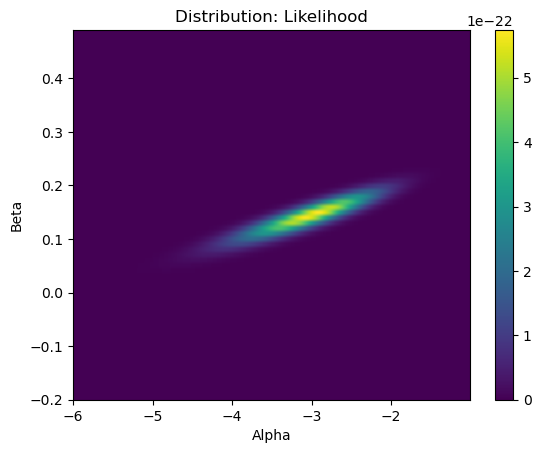

In [61]:
a_prior, b_prior = create_meshgrid(alpha_range=(-6, -1), beta_range=(-0.2, 0.5), step=0.01)
likelihood_grid = display_distribution(likelihood, a_prior, b_prior, func_name='Likelihood')

The likelihood plot shows wave like patterns because we're working with very small numbers, in fact we're hitting numerical precision limits that leads to numerical underflow. This makes it difficult to interpret the likelihood surface and identify the maximum likelihood estimates.

## Log-Likelihood Visualization

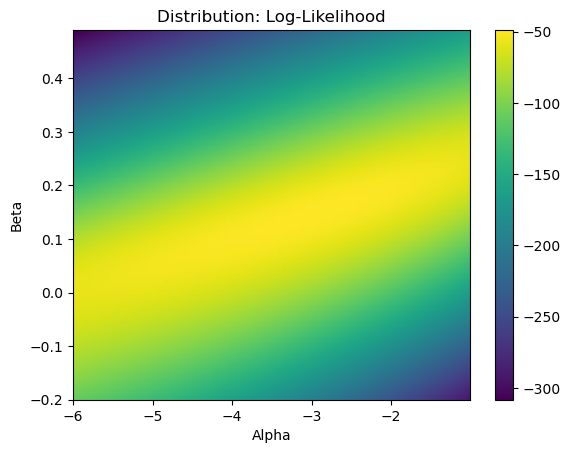

In [62]:
lg_grid = display_distribution(log_lik, a_prior, b_prior, func_name='Log-Likelihood')

The log likelihood plot is smoother and more interpretable than the likelihood plot. The log transformation helps to mitigate the numerical issues seen in the likelihood plot, making it easier to identify the region of maximum likelihood.

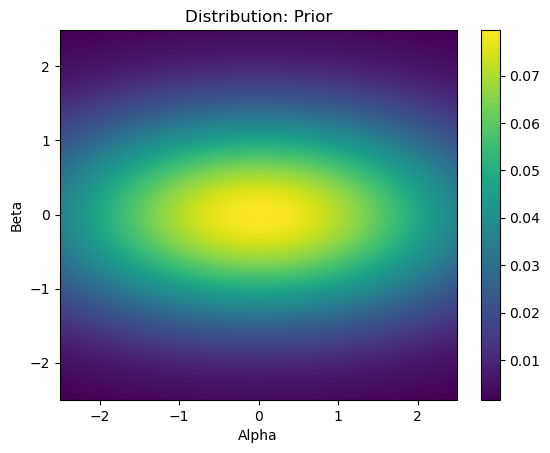

In [64]:
a_prior, b_prior = create_meshgrid(alpha_range=(-2.5,2.5), beta_range=(-2.5, 2.5), step=0.01)

prior = lambda a,b: (1/(4*np.pi)) * np.exp( - (a**2 + 4*b**2)/8 )
prior_grid = display_distribution(prior, a_prior, b_prior, func_name='Prior')    

The prior is mildly informative, centering around (0,0) with lower variance along the beta axis, reflecting our belief that the slope of the relationship between temperature and spoilage is likely to be small.

* Compute the maximum likelihood (ML) estimates $\alpha^{ML}$, $\beta^{ML}$ of the parameters $\alpha$, $\beta$ through numerical optimizations.
* *Hints:*
    * You may use the Python function `scipy.optimize.minimize`.
    * You may look at the figures above to define a good starting point for optimization.
    * You may either minimize the likelihood or the log-likelihood. What is your choice?
* Visualize the likelihood function in 2D together with the ML estimate. Comment the obtained figure.